In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Cat_&_Dog/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(os.listdir('../Cat_&_Dog/'))

# Any results we write to the current directory are saved as output

../Cat_&_Dog/main.ipynb
../Cat_&_Dog/dataset\data0.pickle
../Cat_&_Dog/dataset\data1.pickle
../Cat_&_Dog/dataset\data2.pickle
../Cat_&_Dog/dataset\data3.pickle
../Cat_&_Dog/dataset\data4.pickle
../Cat_&_Dog/dataset\data5.pickle
../Cat_&_Dog/dataset\data6.pickle
../Cat_&_Dog/dataset\data7.pickle
../Cat_&_Dog/dataset\data8.pickle
../Cat_&_Dog/dataset\datasets_preparing.py
../Cat_&_Dog/dataset\labels.pickle
../Cat_&_Dog/dataset\label_names.csv
../Cat_&_Dog/dataset\mean_image_gray.pickle
../Cat_&_Dog/dataset\mean_image_rgb.pickle
../Cat_&_Dog/dataset\std_gray.pickle
../Cat_&_Dog/dataset\std_rgb.pickle
../Cat_&_Dog/dataset\test.pickle
../Cat_&_Dog/dataset\train.pickle
../Cat_&_Dog/dataset\valid.pickle
['dataset', 'main.ipynb']


In [4]:
# Opening file for reading in binary mode
with open('./dataset/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')  # dictionary type

# Preparing y_train and y_validation for using in Keras
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

# Showing loaded data from file
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

# x_train: (86989, 32, 32, 3)
# y_train: (86989, 43)
# x_test: (12630, 32, 32, 3)
# y_test: (12630,)
# x_validation: (4410, 32, 32, 3)
# y_validation: (4410, 43)
# labels: 43


y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


(81, 32, 32, 3)


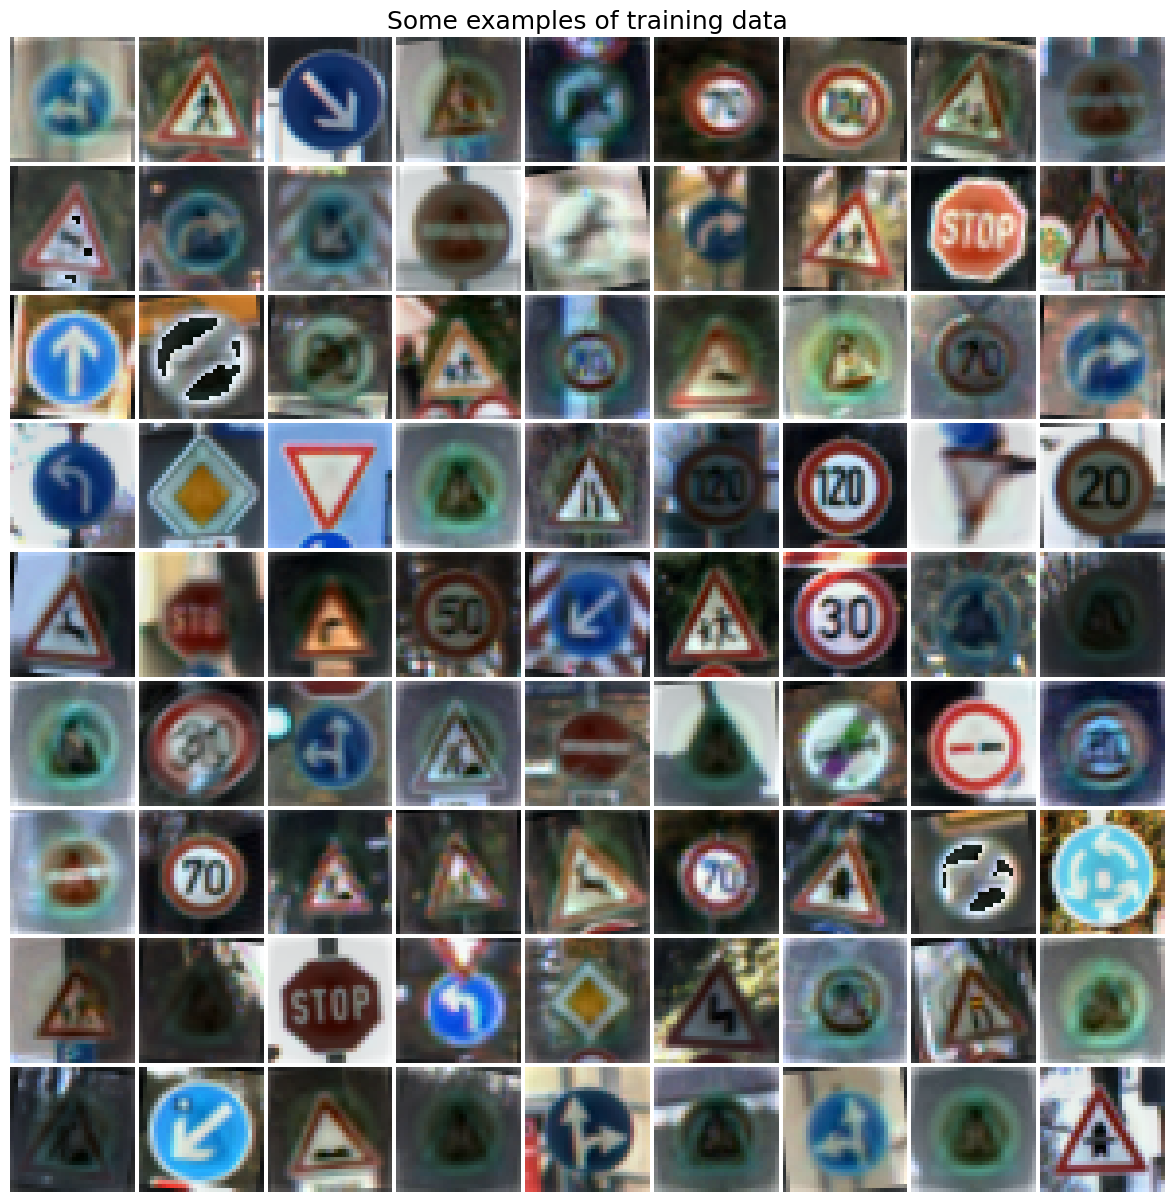

In [5]:
# %matplotlib inline

# Preparing function for ploting set of examples
# As input it will take 4D tensor and convert it to the grid
# Values will be scaled to the range [0, 255]
def convert_to_grid(x_input):
    N, H, W, C = x_input.shape
    grid_size = int(np.ceil(np.sqrt(N)))
    grid_height = H * grid_size + 1 * (grid_size - 1)
    grid_width = W * grid_size + 1 * (grid_size - 1)
    grid = np.zeros((grid_height, grid_width, C)) + 255
    next_idx = 0
    y0, y1 = 0, H
    for y in range(grid_size):
        x0, x1 = 0, W
        for x in range(grid_size):
            if next_idx < N:
                img = x_input[next_idx]
                low, high = np.min(img), np.max(img)
                grid[y0:y1, x0:x1] = 255.0 * (img - low) / (high - low)
                next_idx += 1
            x0 += W + 1
            x1 += W + 1
        y0 += H + 1
        y1 += H + 1

    return grid


# Visualizing some examples of training data
examples = data['x_train'][:81, :, :, :]
print(examples.shape)  # (81, 32, 32, 3)

# Plotting some examples
fig = plt.figure()
grid = convert_to_grid(examples)
plt.imshow(grid.astype('uint8'), cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(15, 15)
plt.title('Some examples of training data', fontsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('training_examples.png')
plt.close()


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(43, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 15

h = model.fit(data['x_train'][:10], data['y_train'][:10],
              batch_size=5, epochs = epochs,
              validation_data = (data['x_validation'], data['y_validation']),
              callbacks=[annealer], verbose=1)


Epoch 1/15
2/2 [==============================] - 4s 4s/step - loss: 3.8262 - accuracy: 0.1000 - val_loss: 3.8551 - val_accuracy: 0.0290 - lr: 4.6329e-04
Epoch 2/15
2/2 [==============================] - 2s 2s/step - loss: 2.8602 - accuracy: 0.5000 - val_loss: 4.0396 - val_accuracy: 0.0365 - lr: 4.4013e-04
Epoch 3/15
2/2 [==============================] - 3s 3s/step - loss: 2.2378 - accuracy: 0.6000 - val_loss: 4.5061 - val_accuracy: 0.0383 - lr: 4.1812e-04
Epoch 4/15
2/2 [==============================] - 3s 3s/step - loss: 1.7416 - accuracy: 0.8000 - val_loss: 5.1369 - val_accuracy: 0.0388 - lr: 3.9721e-04
Epoch 5/15
2/2 [==============================] - 3s 3s/step - loss: 1.3855 - accuracy: 0.9000 - val_loss: 5.7785 - val_accuracy: 0.0376 - lr: 3.7735e-04
Epoch 6/15
2/2 [==============================] - 3s 3s/step - loss: 1.1354 - accuracy: 0.9000 - val_loss: 6.3974 - val_accuracy: 0.0438 - lr: 3.5849e-04
Epoch 7/15
2/2 [==============================] - 3s 3s/step - loss: 0.9696 

In [15]:
print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
      format(epochs, max(h.history['accuracy']), max(h.history['val_accuracy'])))

Epochs=15, training accuracy=1.00000, validation accuracy=0.04490


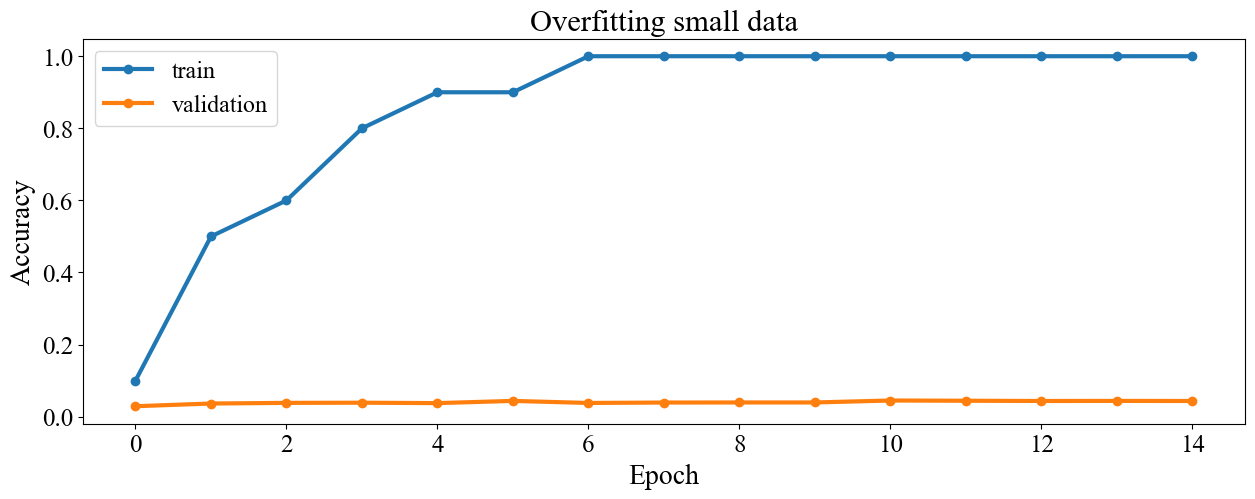

In [17]:
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

fig = plt.figure()
plt.plot(h.history['accuracy'], '-o', linewidth=3.0)
plt.plot(h.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Overfitting small data', fontsize=22)
plt.legend(['train', 'validation'], loc='upper left', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('overfitting_small_data.png')
plt.close()

In [18]:
filters = [3, 5, 9, 13, 15, 19, 23, 25, 31]
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 1 ** (x + epochs))
epochs = 5

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'], data['y_train'], 
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer], verbose=0)
    
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, validation accuracy={3:.5f}'.\
      format(filters[i], epochs, max(h[i].history['accuracy']), max(h[i].history['val_accuracy'])))

Model with filters 3x3, epochs=5, training accuracy=0.98515, validation accuracy=0.85624
Model with filters 5x5, epochs=5, training accuracy=0.97962, validation accuracy=0.85964
Model with filters 9x9, epochs=5, training accuracy=0.97203, validation accuracy=0.86463
Model with filters 13x13, epochs=5, training accuracy=0.96073, validation accuracy=0.83651
Model with filters 15x15, epochs=5, training accuracy=0.95226, validation accuracy=0.82063
Model with filters 19x19, epochs=5, training accuracy=0.93551, validation accuracy=0.81088
Model with filters 23x23, epochs=5, training accuracy=0.91710, validation accuracy=0.81179
Model with filters 25x25, epochs=5, training accuracy=0.90407, validation accuracy=0.81247
Model with filters 31x31, epochs=5, training accuracy=0.87825, validation accuracy=0.76893


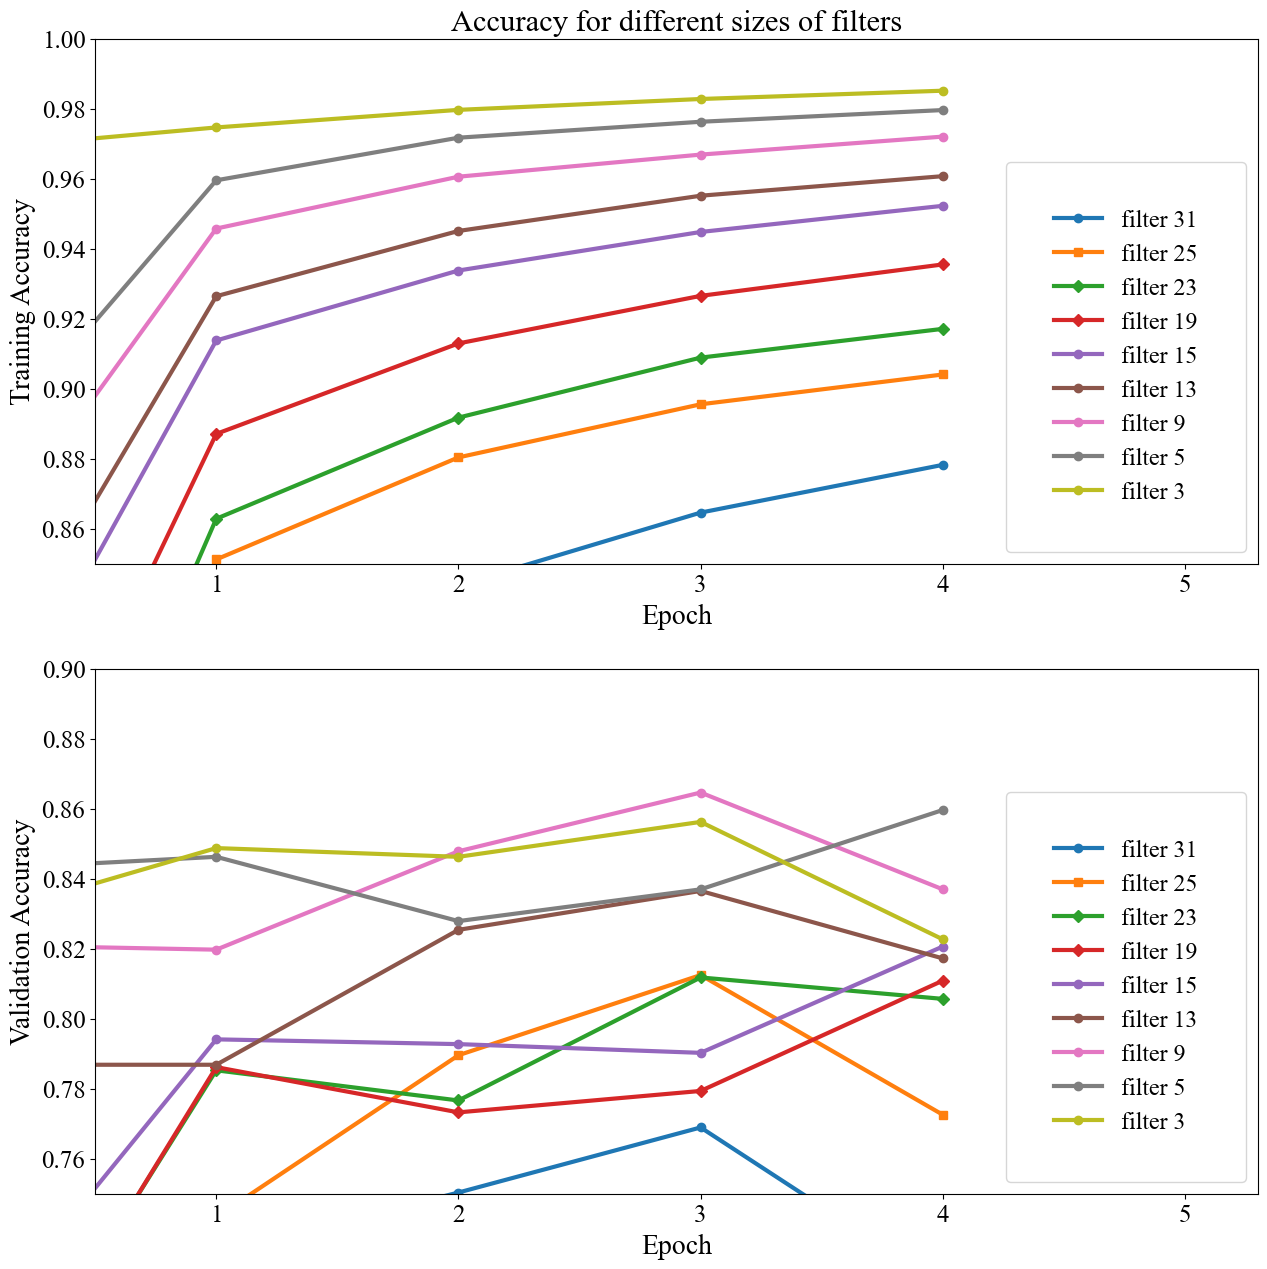

data2 filter 3 training accuracy = 0.98515
data2 filter 5 training accuracy = 0.97962
data2 filter 9 training accuracy = 0.97203
data2 filter 13 training accuracy = 0.96073
data2 filter 15 training accuracy = 0.95226
data2 filter 19 training accuracy = 0.93551
data2 filter 23 training accuracy = 0.91710
data2 filter 25 training accuracy = 0.90407
data2 filter 31 training accuracy = 0.87825

data2 filter 3 validation accuracy = 0.85624
data2 filter 5 validation accuracy = 0.85964
data2 filter 9 validation accuracy = 0.86463
data2 filter 13 validation accuracy = 0.83651
data2 filter 15 validation accuracy = 0.82063
data2 filter 19 validation accuracy = 0.81088
data2 filter 23 validation accuracy = 0.81179
data2 filter 25 validation accuracy = 0.81247
data2 filter 31 validation accuracy = 0.76893


In [23]:
#matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Times New Roman'

# Plotting history of training accuracy
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(h[8].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Training Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.85, 1.0)
plt.xlim(0.5, 5.3) 
plt.title('Accuracy for different sizes of filters', fontsize=22)
plt.tick_params(labelsize=18)

plt.subplot(2, 1, 2)
# plt.gca().set_title('Validation accuracy')
plt.plot(h[8].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[7].history['val_accuracy'], '-s', linewidth=3.0)
plt.plot(h[6].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[5].history['val_accuracy'], '-D', linewidth=3.0)
plt.plot(h[4].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[3].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[2].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[1].history['val_accuracy'], '-o', linewidth=3.0)
plt.plot(h[0].history['val_accuracy'], '-o', linewidth=3.0)
plt.legend(['filter 31', 'filter 25', 'filter 23', 'filter 19', 'filter 15', 'filter 13', 'filter 9', 'filter 5', 'filter 3'], loc='lower right', fontsize='xx-large', borderpad=2)
plt.xlabel('Epoch', fontsize=20, fontname='Times New Roman')
plt.ylabel('Validation Accuracy', fontsize=20, fontname='Times New Roman')
plt.yscale('linear')  # {"linear", "log", "symlog", "logit", ...}
plt.ylim(0.75, 0.9)
plt.xlim(0.5, 5.3)
plt.tick_params(labelsize=18)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('models_accuracy.png')
plt.close()


# Showing values of accuracy for different filters
for i in range(len(h)):
    print('data2 filter {0:d} training accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['accuracy'])))

print()

for i in range(len(h)):
    print('data2 filter {0:d} validation accuracy = {1:.5f}'.\
          format(filters[i], np.max(h[i].history['val_accuracy'])))


In [24]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    # We compare predicted class with correct class for all input images
    # And calculating mean value among all values of following numpy array
    # By saying 'testing_accuracy == data['y_test']' we create numpy array with True and False values
    # 'np.mean' function will return average of the array elements
    # The average is taken over the flattened array by default
    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

395/395 [==============================] - 3s 7ms/step
data2 filter 3 testing accuracy = 0.84070
395/395 [==============================] - 3s 7ms/step
data2 filter 5 testing accuracy = 0.85891
395/395 [==============================] - 4s 9ms/step
data2 filter 9 testing accuracy = 0.85519
395/395 [==============================] - 4s 9ms/step
data2 filter 13 testing accuracy = 0.84568
395/395 [==============================] - 4s 11ms/step
data2 filter 15 testing accuracy = 0.84030
395/395 [==============================] - 6s 15ms/step
data2 filter 19 testing accuracy = 0.82130
395/395 [==============================] - 8s 20ms/step
data2 filter 23 testing accuracy = 0.82162
395/395 [==============================] - 9s 23ms/step
data2 filter 25 testing accuracy = 0.77831
395/395 [==============================] - 17s 42ms/step
data2 filter 31 testing accuracy = 0.74505


In [25]:
# Getting scores from forward pass of one input image
# Scores are given for each image with 43 numbers of predictions for each class
# Measuring at the same time execution time

for i in range(len(model)):
    start = timer()
    temp = model[i].predict(data['x_test'][:1, :, :, :])
    end = timer()
    
    print('data2 filter {0:d} classification time = {1:.5f}'.format(filters[i], end - start))

1/1 [==============================] - 0s 19ms/step
data2 filter 3 classification time = 0.06531
1/1 [==============================] - 0s 24ms/step
data2 filter 5 classification time = 0.05189
1/1 [==============================] - 0s 21ms/step
data2 filter 9 classification time = 0.05057
1/1 [==============================] - 0s 26ms/step
data2 filter 13 classification time = 0.05052
1/1 [==============================] - 0s 28ms/step
data2 filter 15 classification time = 0.05851
1/1 [==============================] - 0s 24ms/step
data2 filter 19 classification time = 0.05596
1/1 [==============================] - 0s 27ms/step
data2 filter 23 classification time = 0.05780
1/1 [==============================] - 0s 30ms/step
data2 filter 25 classification time = 0.06761
1/1 [==============================] - 0s 24ms/step
data2 filter 31 classification time = 0.05507


(3, 3, 3, 32)
(32, 3, 3, 3)


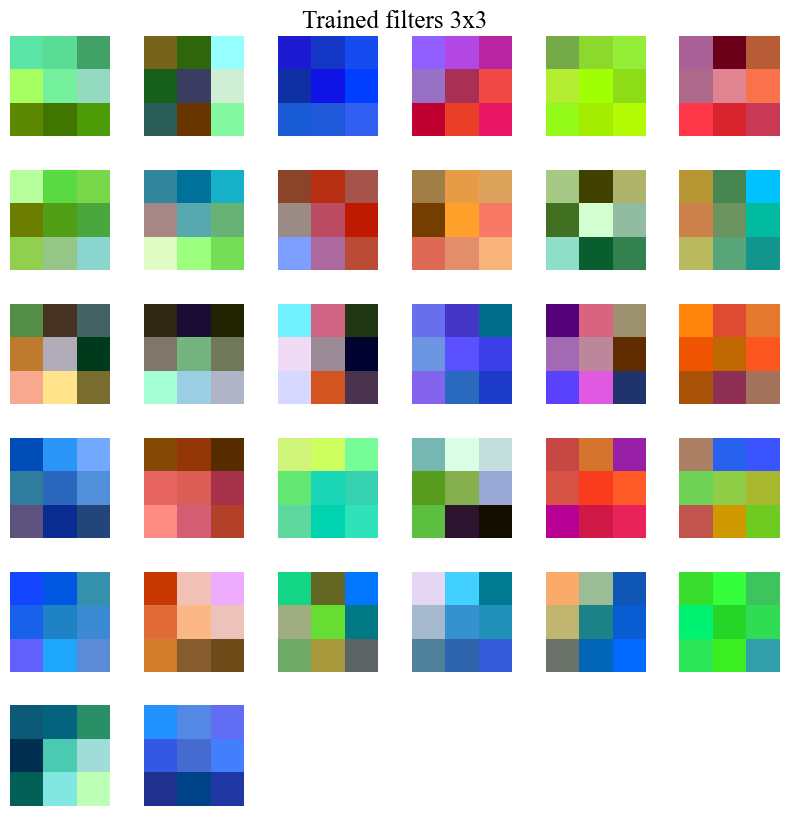

(5, 5, 3, 32)
(32, 5, 5, 3)


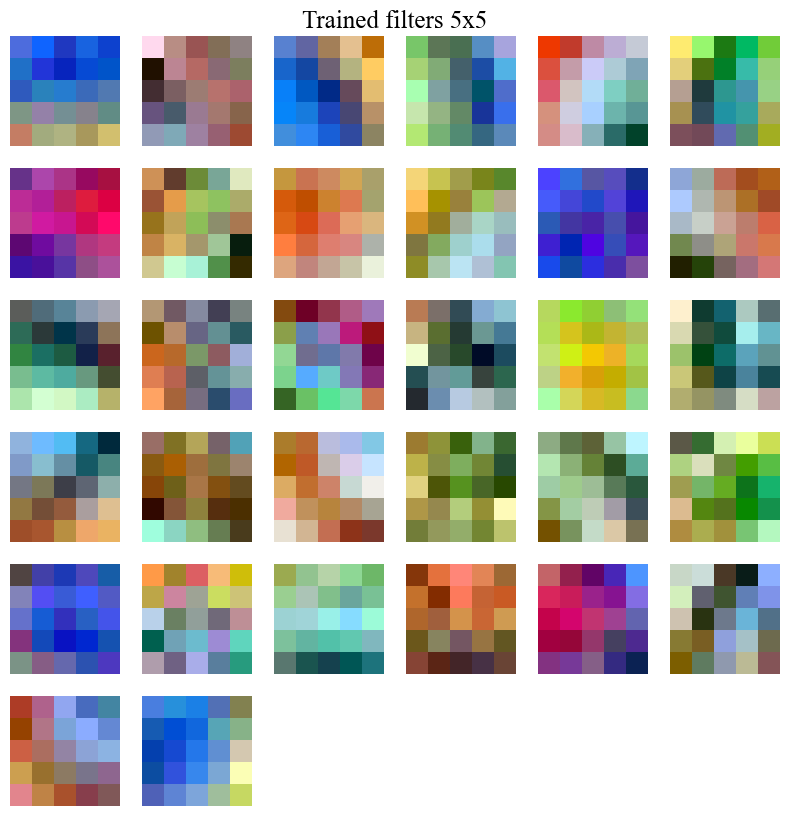

(9, 9, 3, 32)
(32, 9, 9, 3)


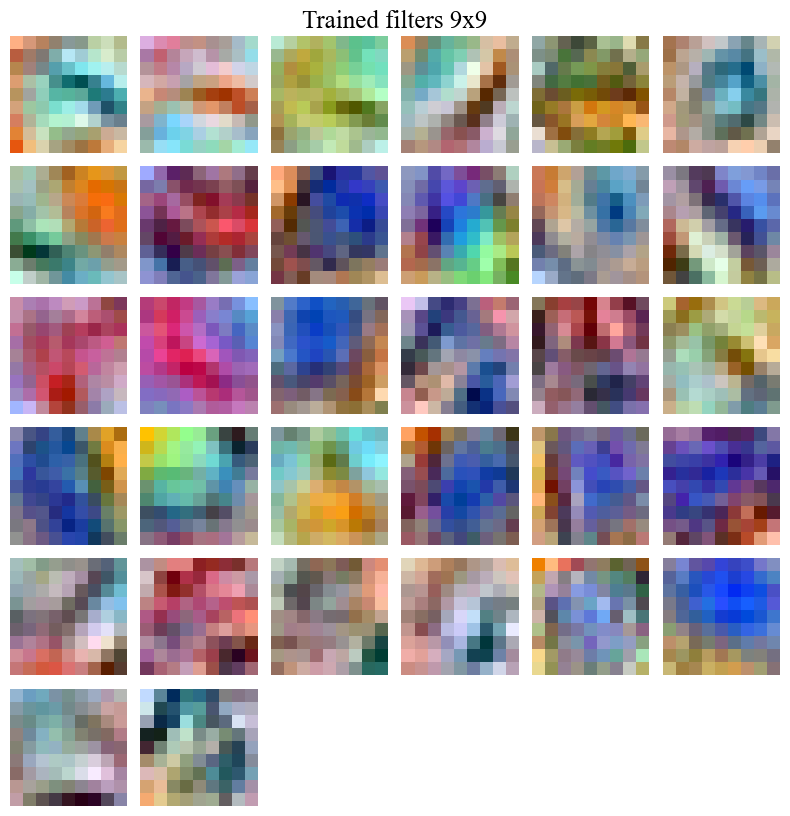

(13, 13, 3, 32)
(32, 13, 13, 3)


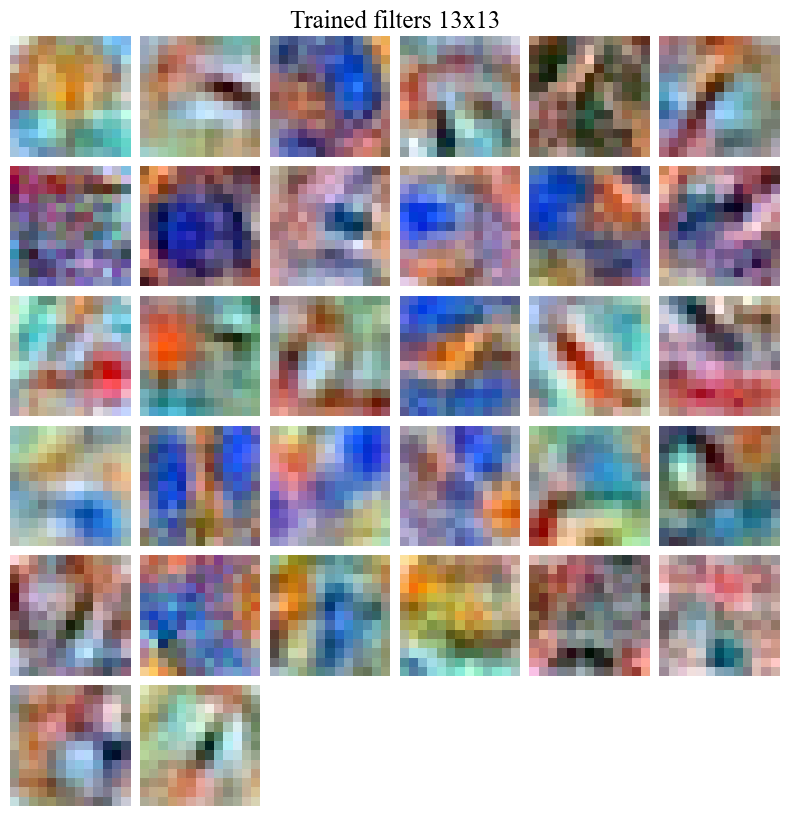

(15, 15, 3, 32)
(32, 15, 15, 3)


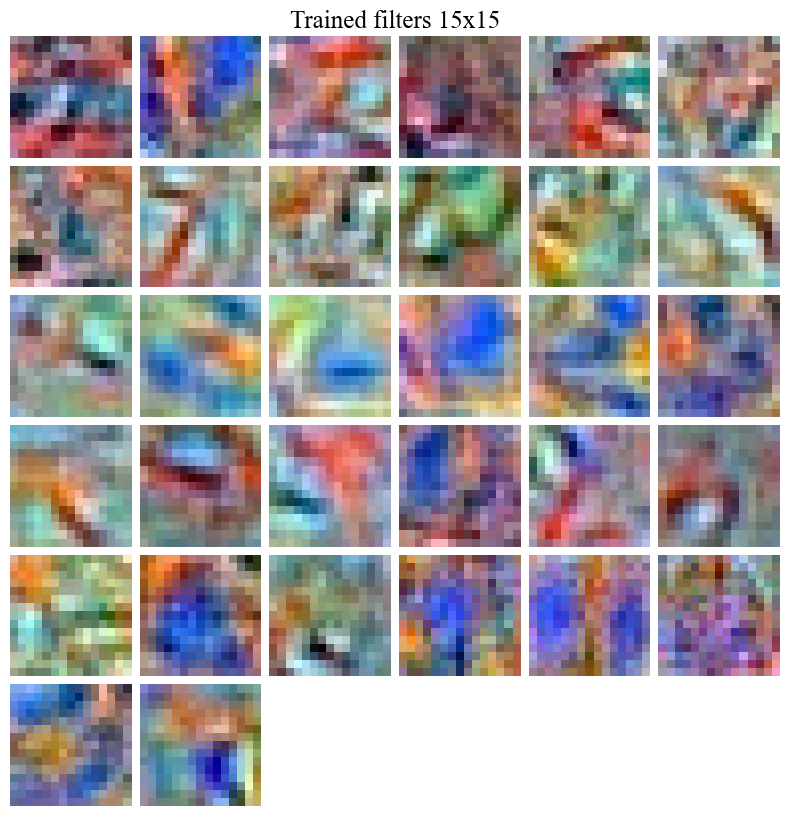

(19, 19, 3, 32)
(32, 19, 19, 3)


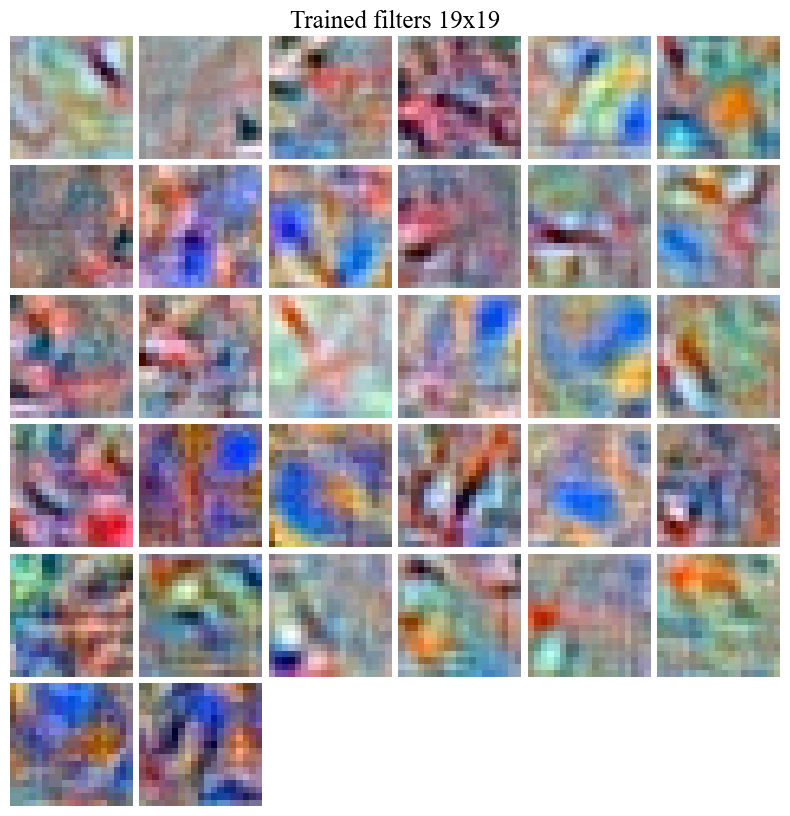

(23, 23, 3, 32)
(32, 23, 23, 3)


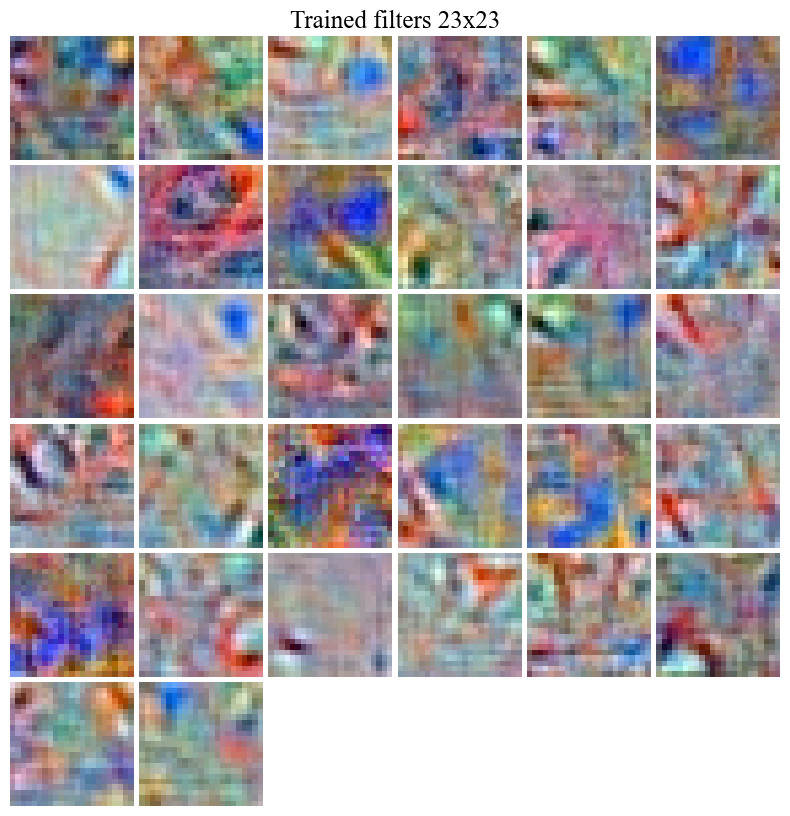

(25, 25, 3, 32)
(32, 25, 25, 3)


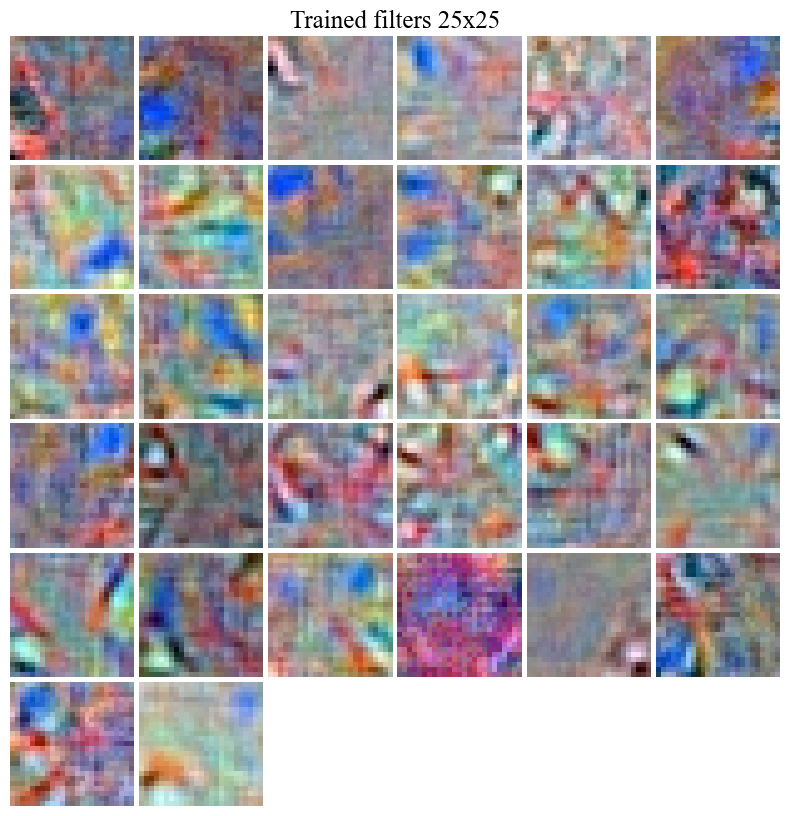

(31, 31, 3, 32)
(32, 31, 31, 3)


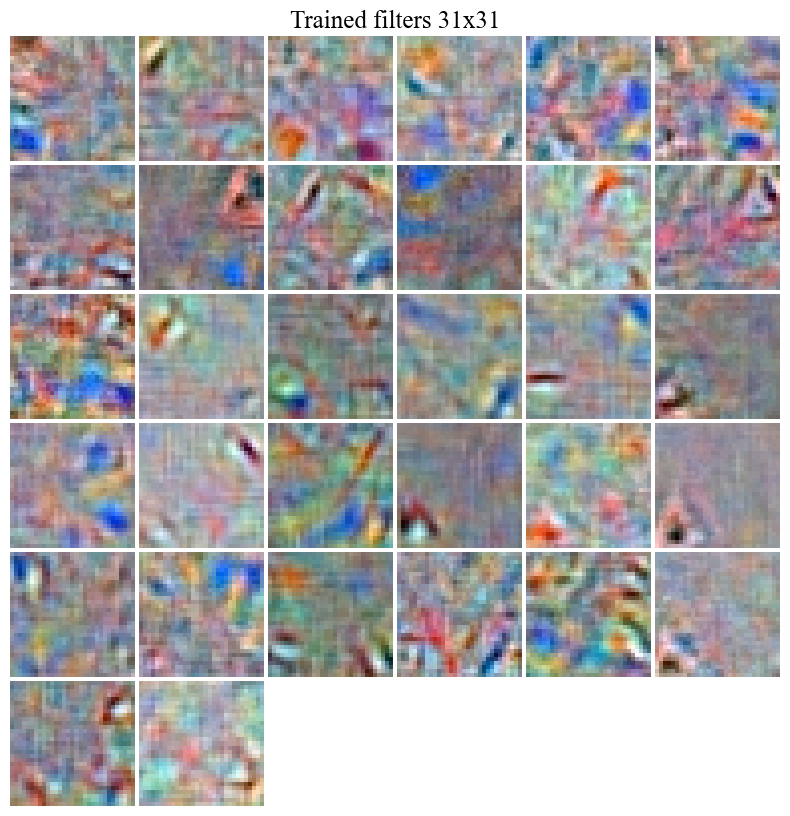

In [26]:
for i in range(len(model)):
    w = model[i].get_weights()
    print(w[0].shape)
    # print(model[i].get_config())
    # l = model[i].layers
    # print(l[0].get_weights()[0].shape)

    # Visualizing filters
    temp = w[0].transpose(3, 0, 1, 2)
    print(temp.shape)  # (81, 32, 32, 3)

    # Plotting
    fig = plt.figure()
    grid = convert_to_grid(temp)
    plt.imshow(grid.astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.gcf().set_size_inches(10, 10)
    name = 'Trained filters ' + str(filters[i]) + 'x' + str(filters[i])
    plt.title(name, fontsize=18)
    
    # Showing the plot
    plt.show()

    # Saving the plot
    name = 'filters-' + str(filters[i]) + 'x' + str(filters[i]) + '.png'
    fig.savefig(name)
    plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 32, 32, 3)
[3]


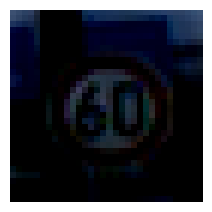

1/1 [==============================] - 0s 28ms/step
(43,)
ClassId: 3
Label: Speed limit (60km/h)


In [44]:
#%matplotlib inline

# Preparing image for predicting from test dataset
x_input = data['x_test'][100:101]
print(x_input.shape)
y_input = data['y_test'][100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model[0].predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list


# Getting labels
labels = label_text('./dataset/label_names.csv')

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])


import pickle
pickle.dump(labels, open('model.pkl','wb'))


In [45]:
for i in range(len(model)):
    name = 'model-' + str(filters[i]) + 'x' + str(filters[i]) + '.h5'
    model[i].save(name)

# # Saving model locally without committing
# from IPython.display import FileLink

# FileLink('model-3x3.h5')